<h1 align="center">Statistics for Machine Learning</h1>
<h2 align="center">Least Squares and Simple Linear Regression</h2>

&nbsp;

### Overview

Simple Linear Regression is a common technique used in a machine learning to fit a straight line to data. This is useful to create a linear model, where measurements for one variable can be used to predict the value of another. In this notebook, simple linear regression is used to build a model that predicts a person's weight based on their height. The underlying theory of linear regression is rooted in Ordinary Least Squares, the closed form equation for which is derived and solved. The theory and results of real heights and weights data is illustrated graphically throughout the notebook using the Matplotlib library. Machine learning terminology such as *feature*, *response* and *cost function* are also introduced.

### Pre-requisites

This notebook builds on the concepts of correlation and covariance to plot a line of best fit through a set of data points. These topics are covered in *Covariance and the Covariance Matrix*, and *Pearson's Correlation Coefficient and R Squared* notebooks.

### Contents

Section 1 - Introduction to Linear Regression

Section 2 - Calculating the Gradient and Intercept of the Regression Line

Section 3 - Linear Regression in Python

Section 4 - Conclusion

Section 5 - Glossary

Section 6 - References

### Loading the Data

The SOCR dataset from UCLA contains height and weight information for 25,000 18 year olds, who form the population for this notebook.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use('seaborn')
df = pd.read_csv('datasets/SOCR-HeightWeight.csv', sep=',')
heights = list(df['Height(Inches)'])
weights = list(df['Weight(Pounds)'])

# Sort data in ascending order by height (required for plotting later)
heights_and_weights = list(zip(heights, weights))
heights_and_weights.sort(key=lambda x: x[0])
heights = [height for height, weight in heights_and_weights]
weights = [weight for height, weight in heights_and_weights]

print(f'Number of rows: {len(df)}')

Number of rows: 25000


<center><h2>Section 1 - Introduction to Simple Linear Regression</h2></center>

### 1.1 - Main Ideas of Simple Linear Regression

In *Pearson's Correlation Coefficient and R Squared* the idea of quantifying how much two variables vary together was written mathematically using the equations for $r$ and $R^2$. These values gave an indication of how well a straight line could be fit to some data points, with the aim of using knowledge of one variable's value, to predict the value of another. The notebook concluded with plotting the line of best fit, but did not give any explanation of the method for finding the line itself. This will be covered in detail now.

The term **Simple Linear Regression** is made up of three parts: *simple*, *linear* and *regression*. The simple part means that the method only deals with bivariate data. That is, a line is only plot for one independent variable (on the $x$-axis), and one dependent variable (on the $y$-axis). This implies there is regression that deals with multiple independent variables - and there is! This idea is covered more in *Multiple Regression*. 

The **linear** part refers to the fact that this method fits *straight* lines to the data. This implies that there are forms of regression where non-straight lines are fit to data - and again there are! Some of these are covered in the notebooks *Multiple Regression*, *Logistic Regression* and *Quantile Regression*.

The final part is **regression**, this is the part that refers to *fitting* a line to some data. Any process where a line is fit to data is called regression.

To summarise:
> Simple Linear Regression is a method to find the line of best fit for bivariate data, that is, data with one independent variable and one dependent variable

### 1.2 - Regression in Machine Learning

Regression as a technique has been around for over 200 years, and so is very well understood in the statistics world. More recently, regression has been immensely useful in the field of machine learning, since it is a simple way to build a prediction model [3]. 

In machine learning jargon, linear regression is a type of **linear model** - that is, it finds a linear relationship between two variables. Most often we are able to make measurements of one variable (the independent variable), and we want to use them to make predictions about another (the dependent variable). The independent variable is sometimes called a **feature**, **regressor**, or **explanatory variable**. The dependent variable is often called the **response**. In Multiple Regression there are multiple independent variables that you can use to make predictions about a response, and so these models have multiple features.

### 1.3 - Ordinary Least Squares

The principle behind how regression fits a straight line to data is quite simple. The output is a line that minimises the sum of the squared distances between itself and each point; these distances are referred to as **residuals**. The name for the sum of their squares differs slightly depending on the resource, but common terms include:

* Residual Sum of Squares (RSS)
* Sum of Squared Residuals (SSR)
* Sum of Squared of Errors (SSE)

This notebook will use the term **Sum of Squared Errors**, SSE. The idea of minimising this value to find the best line to fit the data is called **Ordinary Least Squares** (OLS), or more simply just **Least Squares**. The graph below shows a regression line fitted to the SOCR heights and weights data, with the residuals highlighted in red. The dataset has been reduced to a set of 25 points to make the residuals easier to see. The method for determining this line will be shown in the next section.

&nbsp;

**Note:** the sum of the squared residuals is essentially the *variance* of the points around the line multiplied by the number of points - since variance is just a sum of squared differences divided by the number of points.


In [3]:
def SSE(data, predicted):
    return sum([(data[i]-predicted[i])**2 for i in range(len(data))])

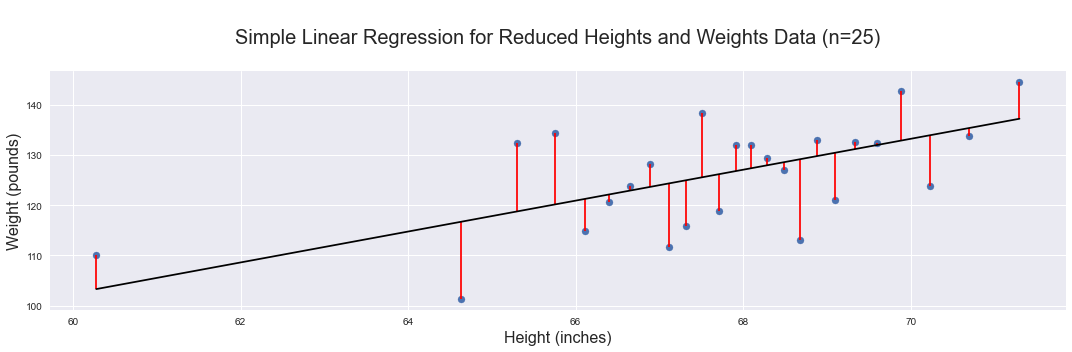

In [4]:
# Get line of best fit
reg_x = [[x] for x in heights]
reg_y = [[y] for y in weights]
reg = LinearRegression().fit(reg_x, reg_y)
m, c = reg.coef_, reg.intercept_

# Reduce data points for plotting
reduced_heights = heights[::1000]
reduced_weights = weights[::1000]
y_predicted = [((m*x)+c)[0][0] for x in reduced_heights]

# Plot the graph
fig, ax = plt.subplots(figsize=(15,5))
for i in range(len(reduced_heights)):
    ax.vlines(x=reduced_heights[i],ymin=y_predicted[i], ymax=reduced_weights[i], color='red')
ax.scatter(reduced_heights, reduced_weights)
ax.plot(reduced_heights,y_predicted, color='black')
ax.set_xlabel('Height (inches)', fontsize=16)
ax.set_ylabel('Weight (pounds)', fontsize=16)
ax.set_title('\nSimple Linear Regression for Reduced Heights and Weights Data (n=25)\n', fontsize=20)
fig.tight_layout()

### 1.4 - Assumptions for Linear Regression

For linear regression to perform as expected a few assumptions need to be satisfied [4]. A summary of the conitions is given below:

* Linearity - a good prediction model can only be formed if a linear relation between the two variables exists ($R^2$ is close to 1)
* Normality - the two variables follow a normal distribution (this does not need to be perfect but helps to produce better results)
* Homoscedasticity - a similar variance between the two variables is important so that the regression line will have low SSE

These assumptions hold fairly well for the SOCR heights and weights data.

<center><h2>Section 2 - Calculating the Gradient and Intercept of the Regression Line</h2></center>

### 2.1 - Ordinary Least Squares as an Optimisation Problem

The idea behind OLS is to find a line which minimises the sum of the squared errors. A straight line takes the form $y = mx + c$, so more specifcally OLS finds the coefficients $m$ and $c$ that result in the smallest SSE value. In the equation, $m$ represents the gradient of the line and $c$ represents the $y$-intercept. This gives two coefficients that must be found.

In machine learning terminology, the sum of the squared errors is called a **cost function** (or loss function). This is because the value of the SSE can be treated as a score for how well the line fits the data. In this case a low score is desired since this corresponds to small errors around the line. Finding a value that minimises a cost function is called an **optimisation problem**, and so we can say that OLS **optimises** the values for $m$ and $c$. Note that there are other kinds of cost function, but the SSE is the most commonly used in linear regression.

### 2.2 - Notation in Linear Regression

As described above, linear regression uses OLS to optimise the coefficients $m$ and $c$ for the equation of a line. However more complex regression uses multiple terms, and so a coefficient is needed for each term. To generalise the equation of the regression line, it is common to write the equation of a line as follows:

&nbsp;

$
y = \beta_0 + \beta_1x
$

&nbsp;

Now when we come to use regression with multiple inputs, it becomes easier to extended the equation for as many terms are necessary:

&nbsp;

$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n
$

&nbsp;

where $x_i$ are the features used to predict the response.

&nbsp;

For simplicity in this notebook, the traditional mathematics notation of $m$ and $c$ will be used. However in the later notebooks of regression, it will be much more simple to align with the machine learning notation of $\beta$. One final note is that there is sometimes a distinction between $\beta$ and $b$, for differentiating between population data and sample data respectively. This discussion will be reserved for the *Multiple Regression* notebook.

### 2.2 - Closed Form Equation for Simple Linear Regression

To determine the optimum values of $m$ and $c$, we can write out an equation for the sum of the squared errors. This should then be minimised, and so we can differentiate and set the result equal to 0. This will give a solution for the values of $m$ and $c$ which cause the cost function to be at a minimum. The following proof builds on an excellent series of videos by Sal Khan [5].

&nbsp;

**Step 1)** Write the SSE Equation

&nbsp;

To obtain the equation for SSE, we can recall the definition:

> SSE is the sum of the squared distances between each point and the regression line.

&nbsp;

For $n$ points in the dataset, the sum of the squared differences will be given by:

&nbsp;

$
SSE = (y_\text{data 1}-y_\text{line 1})^2 + (y_\text{data 2}-y_\text{line 2})^2 + ... + (y_\text{data n}-y_\text{line n})^2 \tag{1}
$

&nbsp;

The values of $y$ for points on the line can be rewritten in terms $m$ and $c$:

&nbsp;

$
SSE = \Big(y_1-(mx_1+c)\Big)^2 + \Big(y_2-(mx_2+c)\Big)^2 + ... + \Big(y_i-(mx_i+c)\Big)^2 \tag{2}
$

&nbsp;

where $x_i$ and $y_i$ represent the $x$ and $y$ coordinates respectively for the $i$ th data point.


&nbsp;

**Step 2) Manipulate the Cost Function**

&nbsp;

Next we can simplify the equation by expanding the squared terms, and simplifying the result:

&nbsp;

$
SSE = \Big(y_1^2-2y_1(mx_1+c)+(mx_1+c)^2\Big) + \Big(y_2^2-2y_2(mx_2+c)+(mx_2+c)^2\Big) + ... + \Big(y_N^2-2y_N(mx_N+c) (mx_N+c)^2\Big) \tag{3}
$

&nbsp;

Expanding further gives:

&nbsp;

$
SSE = \Big(y_1^2-2y_1mx_1-2y_1c+m^2x_1^2+2mx_1c+c^2\Big) 
$

$
+\Big(y_2^2-2y_2mx_2-2y_2c+m^2x_2^2+2mx_2c+c^2\Big)
$

$
+...
$

$
+\Big(y_N^2-2y_Nmx_N-2y_Nc+m^2x_N^2+2mx_Nc+c^2\Big) \tag{4}
$

&nbsp;

In this form it becomes more to collect like terms and rewrite the expression:

&nbsp;

$
SSE = \Big(y_1^2+y_2^2+...+y_N^2\Big) - 2m\Big(x_1y_1+x_2y_2+...+x_Ny_N\Big) -2c\Big(y_1+y_2+...+y_N\Big)
$
$
+m^2\Big(x_1^2+x_2^2+...+x_N^2\Big) + 2mc\Big(x_1+x_2+...+x_N\Big) + Nc^2 \tag{5}
$

&nbsp;

Now notice that each term contains the sum of a quantity from $i$=1 to $i$=$N$. These terms are equivalent to the mean of the quantity multiplied by the number of points, $N$. Here is as example using the first term:

&nbsp;

$
\Big(y_1^2+y_2^2+...+y_N^2\Big) = \sum\limits_{i=0}^{N}y_i^2 = N\frac{\sum\limits_{i=0}^{N}y_i^2}{N} = N\bar{x}  
$

&nbsp;

Using this fact, we can simplify the equation further to produce the final manipulation:

&nbsp;

$
SSE = N\bar{y^2} - 2mN\bar{xy} -2cN\bar{y} + m^2N\bar{x^2} + 2mcN\bar{x} + Nc^2 \tag{6}
$



**Step 3) Minimise the Cost Function**

&nbsp;

To minimise the cost function we can take its derivative and set the result equal to 0. As visualised in the cell below, this finds the minimum of the error surface and hence gives the optimum values for $m$ and $c$. Since SSE is a function of two inputs, we take the partial derivative with respect to each input, and set those equal to 0. This will give a system of equations that can be solved simulataneously.

&nbsp;

$
\frac{\partial}{\partial m}\Big(SSE\Big) = 0
$

&nbsp;

$
\frac{\partial}{\partial c}\Big(SSE\Big) = 0
$

&nbsp;

First, take the partial derivative with respect to $m$, and so treat terms in $c$ as constants.

&nbsp;

$
\frac{\partial}{\partial m}\Big(N\bar{y^2} - 2mN\bar{xy} -2cN\bar{y} + m^2N\bar{x^2} + 2mcN\bar{x} + Nc^2\Big) = 0 \tag{6}
$

&nbsp;

$
-2N\bar{xy} + 2mN\bar{x^2} + 2cN\bar{x} = 0 \tag{7}
$

&nbsp;

$
-\bar{xy} + m\bar{x^2} + c\bar{x} = 0 \tag{8}
$

&nbsp;

Next, take the partial derivative with respect to $c$, and so treat terms in $m$ as constants.

&nbsp;

$
\frac{\partial}{\partial m}\Big(N\bar{y^2} - 2mN\bar{xy} -2cN\bar{y} + m^2N\bar{x^2} + 2mcN\bar{x} + Nc^2\Big) = 0 \tag{9}
$

&nbsp;

$
-2N\bar{y} + 2mN\bar{x} + 2Nc = 0 \tag{10}
$

&nbsp;

$
-\bar{y} + m\bar{x} + c = 0 \tag{11}
$

**Step 4) Solve for $m$ and $c$**

&nbsp;

Using (8) and (11) we can solve for the values of $m$ and $c$ give the lowest sum of squared errors. Starting with (11), adding $\bar{y}$ to both sides of the equation gives:


&nbsp;

$
\bar{y} = m\bar{x} + c = 0 \tag{12}
$

&nbsp;

This is an interesting result since it takes the form $y = mx +c$. From this we can see that the point $(\bar{x},\bar{y})$ lies on the regression line. We can divide (8) by $\bar{x}$ and rearrange to get another equation of the form $y = mx + c$:

&nbsp;

$
\frac{\bar{xy}}{\bar{x}} = m\frac{\bar{x^2}}{\bar{x}} + c = 0 \tag{13}
$

&nbsp;

This gives another point on the regression line, $\Big(\frac{\bar{x^2}}{\bar{x}},\frac{\bar{xy}}{\bar{x}}\Big)$. At this point we have two points on a straight line so we could stop here an determine the equation of the straight line directly. But to complete the optimisation problem, we will solve for the coefficients $m$ and $c$ explicitly.

&nbsp;

To continue solving the equations simulatenously, take (13) from (12):

&nbsp;

$
\bar{y} = m\bar{x} + c = 0
$

$
-\Big(\frac{\bar{xy}}{\bar{x}} = m\frac{\bar{x^2}}{\bar{x}} + c = 0\Big)
$

&nbsp;

Which gives:

&nbsp;

$
\bar{y}-\frac{\bar{xy}}{\bar{x}} = m\Big(\bar{x}-\frac{\bar{x^2}}{\bar{x}} \Big) \tag{14}
$

&nbsp;

From this equation we can extract the result for $m$ (note that this gives the same result as finding the gradient from the difference in $y$ over the difference in $x$ from the two points found earlier in this step):

$
m = \frac{\bar{y}-\frac{\bar{xy}}{\bar{x}}}{\Big(\bar{x}-\frac{\bar{x}^2}{\bar{x}} \Big)} \tag{15}
$

&nbsp;

Simplifying:

&nbsp;

$
m = \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x}} \tag{16}
$

&nbsp;

To find $c$ simply substitute $m$ (16) back into (12):

&nbsp;

$
\bar{y} = m\bar{x} + c = 0
$

&nbsp;

$
\bar{y} = \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x}}\bar{x} + c \tag{17}
$

&nbsp;

$
c = \bar{y} - \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x}}\bar{x} \tag{18}
$


### Results

The results of the above proof can be summarised with the two following equations. These can be used to find the gradient and $y$-intercept of the regression line for any bivariate data. Since these equations were derived from the idea of finding the lowest sum of squared error values, applying them to a regression problem can be called Ordinary Least Squares.

&nbsp;

$
m = \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x}}
$

&nbsp;

$
c = \bar{y} - \frac{\bar{x}\bar{y}-\bar{xy}}{(\bar{x})^2-\bar{x}}\bar{x}
$

&nbsp;

### 2.3 - Visualising the Optimisation Problem

The cost function for the simple linear regression case of OLS will only have two coefficients to optimise, and so we can visualise the value of SSE in 3-dimensions on a graph. The $m$ and $c$ axes show different values for the coefficients, and the $SSE$ axis shows the corresponding value of the cost function for those inputs. This produces hyperplane known as the **error surface** (a hyperplane being any $n$-dimensional surface representing a subspace with one dimension less than the ambient space). The shape of this surface is a *well*, with the minimium (lowest point on the surface) found at the optimum values for $m$ and $c$.

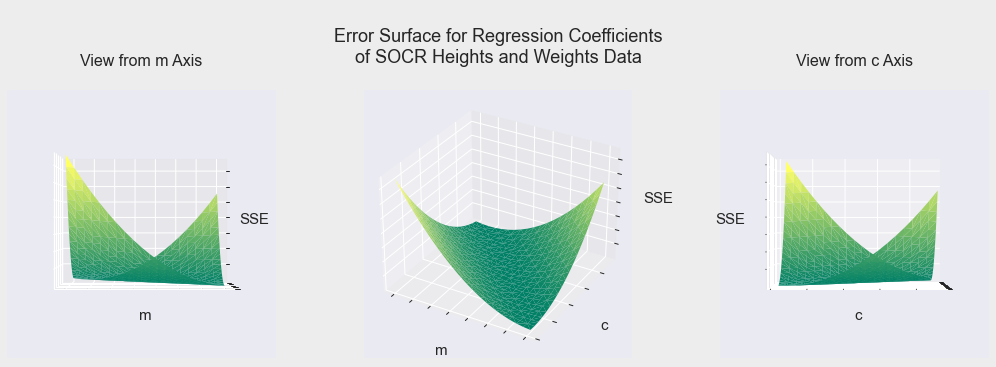

In [20]:
fig = plt.figure(figsize=(15,5))
fig.patch.set_facecolor('#ededed')

ax_1 = fig.add_subplot(1, 3, 1, projection='3d')
ax_1.view_init(0,-90)
ax_1.set_title('View from m Axis\n', fontsize=16)

ax_2 = fig.add_subplot(1, 3, 2, projection='3d')
ax_2.set_title('\nError Surface for Regression Coefficients\nof SOCR Heights and Weights Data\n', fontsize=18)

ax_3 = fig.add_subplot(1, 3, 3, projection='3d')
ax_3.view_init(0,0)
ax_3.set_title('View from c Axis\n', fontsize=16)

m_values = []
c_values = []
SSE_values = []

for m in np.linspace(2.5, 6, 20):
    for c in np.linspace(-290, -70, 20):
        y_pred = [(m*x)+c for x in reduced_heights]
        m_values.append(m)
        c_values.append(c)
        SSE_values.append(SSE(reduced_weights, y_pred))


for ax in [ax_1, ax_2, ax_3]:
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    ax.set_zlabel('SSE', fontsize=15)
    ax.plot_trisurf(m_values, c_values, SSE_values, cmap=plt.cm.summer)
    if ax is not ax_1:
        ax.set_ylabel('c', fontsize=15)
    if ax is not ax_3:
        ax.set_xlabel('m', fontsize=15)

fig.tight_layout()

### 2.4 - Closed Form Equations for Multiple Inputs

In this simple example, we wanted to use the height of a person in this dataset to predict their weight. Since we are only using the height, there is only one feature in the model. The regression line formed is a simple linear relation between one independent variable and one dependent variable. For these simple cases, we can easily find the $m$ and $c$ coefficients using the results from the closed form equation for simple linear regression.

Sometimes however we need to use multiple features to predict a response (Multiple Regression). In these more complex cases, the closed form solution requires multiple partial differentials, but in essence still follows the same procedure. The problem with the results however, is that the computational cost of using them grows very quickly with complexity - and so this solution does not scale well. 

For this reason, more complex regression usually does not use the closed form equation to determine the coefficients for the regression line. Instead an algorithm called **Gradient Descent** is used, which is described in the notebook *Gradient Descent*.

&nbsp;

<center><h2>Section 3 - Linear Regression in Python</h2></center>

### 3.1 - The Options for Linear Regression in Python

In Python there are two main choices for working with linear regression models: SciKit Learn, and Statsmodels. Both are very popular packages, and have slightly different takes on solving the problem:

&nbsp;

* SciKit Learn - gives simple outputs to build a model quickly
* Statsmodels - gives very detailed outputs to analyse the input data

&nbsp;

SciKit Learn is primarily a machine learning package, and as such focusses more on the implementation of the model and using it to extract meaning from datasets. Statsmodels is primarily a statistics package, and so focusses more on the statistical interpretation of the data. The next section will detail how to use linear regression models in both libraries with examples.

### 3.2 - Linear Regression in SciKit Learn

SciKit Learn implements linear regression using a class called LinearRegression, which is found in the `linear_model` package [6]. To use it, first create a model which is an object of the `LinearRegression` class, and call the `fit` method. This takes two positional arguments: `X` and `Y`. These expect array-like objects contain data for the feature and response respectively. A third optional argument is also possible, which allows an array of weights to be passed to weight data points differently in the SSE calculation.

The `score` method returns the coefficient of determination ($R^2$) value, which gives a measure of the relation between the variables (see *Pearson's Correlation Coefficient and R Squared* for more).

The `predict` method takes an array-like object of feature values and returns an array of predicted response values that lie on the regression line.

The attributes `coef_` and `intercept_` give the values for the gradient and $y$-intercept of the line respectively.

&nbsp;

**Note:**

The `fit` method expects the data be in 2-dimensional arrays, even if the data only represents a 1-dimensional list of values (heights or weights in this case). To account for this, the first two lines use a list comprehension which ensures each element of the heights and weights lists are stored in sub-lists. This adds the extra dimension to the list. These reformatted lists have been called `reg_x` and `reg_y` since this are the $x$ and $y$ values for the regression.

In addition, the `LinearRegression` object returns the coefficients within nested arrays, and so multiple indices can be used to extract them.

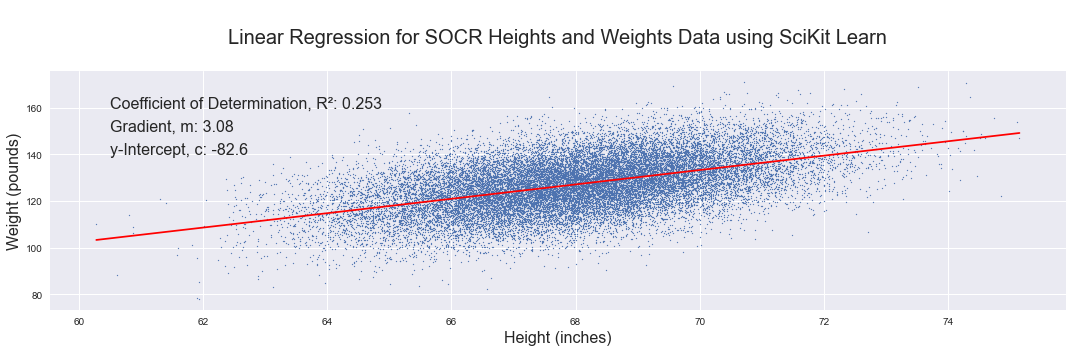

In [61]:
reg_x = [[x] for x in heights]
reg_y = [[y] for y in weights]

model = LinearRegression()
model.fit(reg_x, reg_y)

R_squared = model.score(reg_x, reg_y)
m = model.coef_[0][0]
c = model.intercept_[0]

fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('\nLinear Regression for SOCR Heights and Weights Data using SciKit Learn\n', fontsize=20)
ax.set_xlabel('Height (inches)', fontsize=16)
ax.set_ylabel('Weight (pounds)', fontsize=16)
ax.annotate(text=f'Coefficient of Determination, R\u00B2: {R_squared:.3f}', xy=(60.5,160), fontsize=16)
ax.annotate(text=f'Gradient, m: {m:.2f}', xy=(60.5,150), fontsize=16)
ax.annotate(text=f'y-Intercept, c: {c:.1f}', xy=(60.5,140), fontsize=16)
ax.scatter(heights, weights, s=1)
ax.plot([min(heights), max(heights)], model.predict([[min(heights)], [max(heights)]]), color='red')
fig.tight_layout()

### 3.3 - Linear Regression in Statsmodels

Statsmodels is a statistics library that provides detailed analyses for many types of statistical tests and models [7]. Unlike SciKit Learn, different types of regression can all be implemented with the same class: `OLS`. Objects of this class use ordinary least squares (OLS), and can be fit to cases of simple linear regression, multiple linear regression (including polynomial regression), quantile regression and more.

To get started, import `statsmodels.api` as `sm`, which is the convention recommended in the documentation. By default, the `OLS` class does not optimise the $y$-intercept for regression lines, but rather only the coefficents for the feature variable(s). To force the object to optimise the $y$-intercept, the feature input needs to be converted to a 2-dimensional array with a column of 1s in the first column. The `statsmodels.api` package includes a function for this conversion, which is called `add_constant`. It is convention to pass in the $x$ variable to this class and save the result into a second variable called `X`, but any appropriate name will do. If the number is a Python list, it will be cast to a NumPy array during the conversion.

In [30]:
import statsmodels.api as sm

# Add a column of 1s to the feature variable so that the model also optimises the y-intercept
X = sm.add_constant(heights)
X

array([[ 1.     , 60.27836],
       [ 1.     , 60.61265],
       [ 1.     , 60.8062 ],
       ...,
       [ 1.     , 74.8489 ],
       [ 1.     , 75.11519],
       [ 1.     , 75.1528 ]])

With the independent variable in the correct format, a model object can now be instantiated using the `OLS` class. To do this, pass the dependent variable followed by the independent variable as arguments to `sm.OLS`.

To fit the model to the data, call the `fit` method. A detailed summary of the results can be seen using the `summary method` - this is the main difference between the SciKit Learn and Statsmodels implementations. SciKit Learn does not have a similar method, and cannot produce such detailed analyses. The `fit` method returns a RegressionResultsWrapper object which can be printed to give a detailed print-out of the analysis.

In [35]:
model = sm.OLS(weights, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     8461.
Date:                Fri, 25 Mar 2022   Prob (F-statistic):               0.00
Time:                        16:23:43   Log-Likelihood:                -93235.
No. Observations:               25000   AIC:                         1.865e+05
Df Residuals:                   24998   BIC:                         1.865e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -82.5757      2.280    -36.214      0.0

The RegressionResultsWrapper object stores the results of the analysis in attributes, which can be acessed using standard Python 'dot' notation. The optimised coefficients for the regression line are stored as an array in the `params` attribute. The coefficients are ordered according to the feature array. In this case, the $y$-intercept is given first ($c$ or $\beta_0$) followed by the gradient ($m$ or $\beta_1$). The coefficient of determination can be accessed using the `rsquared` attribute.

In [54]:
print(f'Coefficients: {results.params}')
print(f'R\u00B2: {results.rsquared:.3f}')

Coefficients: [-82.57574306   3.08347645]
R²: 0.253


To make a prediction, call the `predict` method on the RegressionResultsWrapper, and pass in the feature values to predict the response for. Note that the feature array must have a column of 1s to fit the regression line for the same reasons as described with the `OLS` object.

In [44]:
prediction = results.predict(X)
print(prediction)

[103.29116016 104.3219355  104.91874237 ... 148.21907705 149.04017599
 149.15614554]


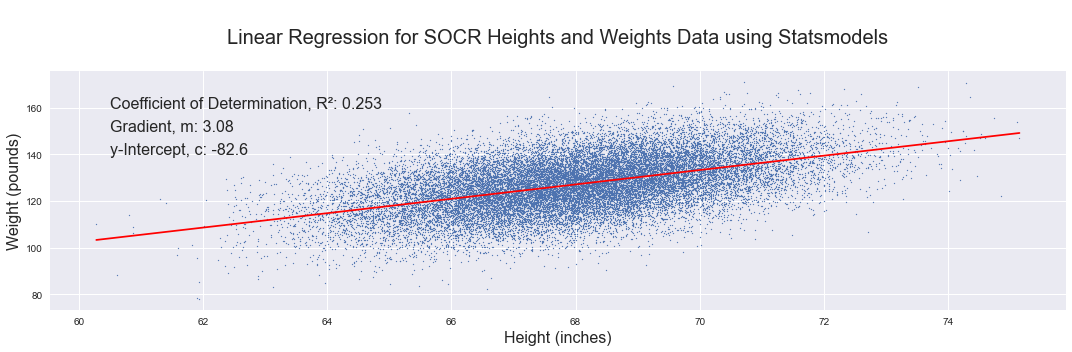

In [62]:
R_squared = results.rsquared
m = results.params[1]
c = results.params[0]

fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('\nLinear Regression for SOCR Heights and Weights Data using Statsmodels\n', fontsize=20)
ax.set_xlabel('Height (inches)', fontsize=16)
ax.set_ylabel('Weight (pounds)', fontsize=16)
ax.annotate(text=f'Coefficient of Determination, R\u00B2: {R_squared:.3f}', xy=(60.5,160), fontsize=16)
ax.annotate(text=f'Gradient, m: {m:.2f}', xy=(60.5,150), fontsize=16)
ax.annotate(text=f'y-Intercept, c: {c:.1f}', xy=(60.5,140), fontsize=16)
ax.scatter(heights, weights, s=1)
ax.plot([heights[0], heights[-1]], [results.predict(X[0]), results.predict(X[-1])], color='red')
fig.tight_layout()

<center><h2>Section 4 - Conclusion</h2></center>

Simple Linear Regression and Ordinary Least Squares are very useful tools for building prediction models in machine learning. These techniques form the foundation for more complex types of regression (such as multiple regression), which can be used to build prediction models based on many different factors. Implementing linear regression in Python is made quite simple using the SciKit Learn and Statsmodels libraries.

<center><h2>Section 5 - Glossary</h2></center>

**Cost Function**
> A measure of how well a solution performs. In the case of regression this is the sum of the squared errors which gives a measure for how well a line fits some data points

**Error Surface**
> The hyperplane formed by mapping each combination of coefficients in an optimisation problem to a point representing the value of the cost function for those inputs

**Explanatory Variable**
> See *Feature*

**Feature**
> An independent variable that can be used to make predictions about the dependent variable (response)

**Gradient Descent**
> An algorithm for estimating the coefficients for an optimisation problem

**Linear**
> A straight-line relation

**Linear Model**
> A straight-line used to make predictions about a response based on the value of a feature

**Linear Regression**
> Fitting a line of best fit to data

**Optimise**
> Minimising (or maximising) a value, usually minimising a cost function

**Ordinary Least Squares**
> A cost function often used in linear regression where the measure of a line's fit is given by the sum of the squared residuals

**Optimisation Problem**
> A problem where coefficients need to be found which minimise a cost function

**Regression**
> Fitting a line to data

**Regressor**
> See *Feature*

**Response**
> A dependent variable, usually that is trying to be predicted using independent variables (features)

**Residual**
> The distance between a data point and the regression line

**Sum of Squared Errors**
> The sum of the squared residuals

<center><h2>Section 6 - References</h2></center>

[1] SOCR Heights and Weights dataset - [UCLA](http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html)

[2] Dataset download - [Kaggle](https://www.kaggle.com/burnoutminer/heights-and-weights-dataset/version/1)

[3] Linear Regression in Machine Learning - [Machine Learning Mastery](https://machinelearningmastery.com/linear-regression-for-machine-learning/)

[4] Assumptions for Linear Regression - [Medium](https://medium.com/analytics-vidhya/its-all-about-regression-part-1-c002fcaa8a55#:~:text=Ordinary%20least%20squares%2C%20or%20OLS,prediction%20made%20by%20the%20model.)

[5] Closed Form Equation of OLS - [khan Academy](https://www.khanacademy.org/math/statistics-probability/describing-relationships-quantitative-data/more-on-regression)

[6] SciKit Learn Linear Regression Documentation - [SciKit Learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[7] Statsmodels Linear Regression Documentation - [Statsmodels](https://www.statsmodels.org/stable/regression.html)